## Logistic Regression
- Best Fit line represented by y=x1.w1+x2.w2+....+xn.wn
- Prediction carried out by plugging points in best fit line equation and followed by sigmoid function, where sign of output determines classification
- Fit of line calculated using log loss.
- Parameters computed using gradient descent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from implementation.LogisticRegression import LogisticRegression
plt.style.use('ggplot')
%matplotlib inline

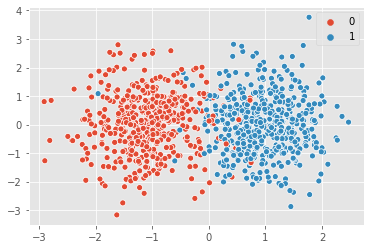

In [2]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

sns.scatterplot(x[:,0],x[:,1],hue = y.reshape(-1))

x_test = x[:500]
y_test = y[:500]
x = x[500:]
y = y[500:]

In [3]:
# To Visualize decision boundary
def visualize(model, title):
    print("Test accuracy = {}".format(model.evaluate(x_test, y_test)))
    
    x1 = np.arange(-5, 6, 0.2)
    x2 = np.arange(-5, 4, 0.2)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred = model.predict([np.array(np.array([x1[i], x2[j]]))])[0]
            if(pred > 0.5):
                plt.scatter(x1[i], x2[j], c = "c")
            else:
                plt.scatter(x1[i], x2[j], c = "b")
    
    plt.title(title)
    plt.show()

--------- epoch 10 -------> loss=1.1898976207368948 ----------
--------- epoch 20 -------> loss=1.3743585875005344 ----------
--------- epoch 30 -------> loss=1.5341966728725482 ----------
--------- epoch 40 -------> loss=1.6740889724752006 ----------
--------- epoch 50 -------> loss=1.7980615688034822 ----------
--------- epoch 60 -------> loss=1.9092176720159142 ----------
--------- epoch 70 -------> loss=2.009901828869363 ----------
--------- epoch 80 -------> loss=2.1018963678348945 ----------
--------- epoch 90 -------> loss=2.186575581365739 ----------
--------- epoch 100 -------> loss=2.2650163048315486 ----------
Test accuracy = 0.964


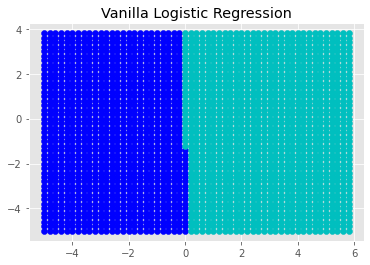

In [4]:
model=LogisticRegression()
model.fit(x, y ,print_every_nth_epoch = 10 )
visualize(model, "Vanilla Logistic Regression")

### Ridge Regression
- It penalizes slope decreasing dependency on features
- We add sum(weights ^ 2) * lambda to the loss function
- It trades bias for higher variance

--------- epoch 10 -------> loss=1.450853418126809 ----------
--------- epoch 20 -------> loss=1.8138520823202586 ----------
--------- epoch 30 -------> loss=2.2299567431988994 ----------
--------- epoch 40 -------> loss=2.7143511068745183 ----------
--------- epoch 50 -------> loss=3.285164364309112 ----------
--------- epoch 60 -------> loss=3.962524970675032 ----------
--------- epoch 70 -------> loss=4.768032794877832 ----------
--------- epoch 80 -------> loss=5.7242711275245695 ----------
--------- epoch 90 -------> loss=6.8540077453048145 ----------
--------- epoch 100 -------> loss=8.178666934074585 ----------
Test accuracy = 0.946


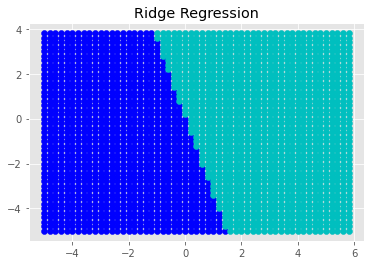

In [5]:
model1 = LogisticRegression(regulaization = "L2")
model1.fit(x, y, lambda_ = 0.01, print_every_nth_epoch=10)
visualize(model1,"Ridge Regression")

### Lasso Regression
- Same as ridge regression, it penalizes weights
- It adds sum(abs(weights))*lambda to the loss function
- Unlike ridge regression, it can minimize slope to zero thus helping in feature regression

--------- epoch 100 -------> loss=2.36093157661164 ----------
Test accuracy = 0.964


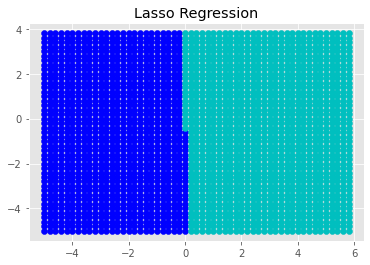

In [6]:
model2 = LogisticRegression(regulaization = "L1")
model2.fit(x, y, print_every_nth_epoch = 100, lambda_=0.001)
visualize(model2, "Lasso Regression")